
# Project#2: Investigate The Movie Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conc">Conclusoins</a></li>
    <li><a href="#limit">Limitations</a></li>
<li><a href="#ref">References</a></li>
</ul>


 <a id='intro'></a>
## Introduction

In this project I will be analayzing the movies data set which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
My aim from this data anaylsis to be able to answer the following questions: 
 #### 1- Who are the top 10 actors who have acted the most ? 
 #### 2- Who are the top 10 directors who have directed the most ?
 #### 3- What genre is most used in the movie industry through the years ? 
 #### 4-What are the top movies that has had the highest profits ?  
 #### 5- Does the budget has an affect on the profits of the movie ? 

In [70]:
#import libraries that will be used in the project 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# <a id='wrangling'></a>
## Data Wrangling

In this section of the project , I will load the data from the "tmdb-movies.csv" , I will get to know the data more by using specified methods mentioned below as describe() and shape() ,I will try to undertand what are the main features that must be cleaned/trimmed in order tp produce a high quality data set. 


In [71]:
#load the data 
movies = pd.read_csv('tmdb-movies.csv')
movies.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [72]:
#get to know my data set more 
movies.shape

(10866, 21)

In [73]:
#get to know my data set more
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [74]:
#Know the data 
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

clearly the release_date data type is wrong and must be changed 

In [75]:
#check for null values 
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

there are many columns that would do no good to answering my questions such as overview and tagline and contain lots of null values 
Also the data set has lots of missing values

In [76]:
# check for duplicates in the data 
sum(movies.duplicated())

1

There is only one row od duplication and it must be dropped

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27f94410>,
      dtype=object)

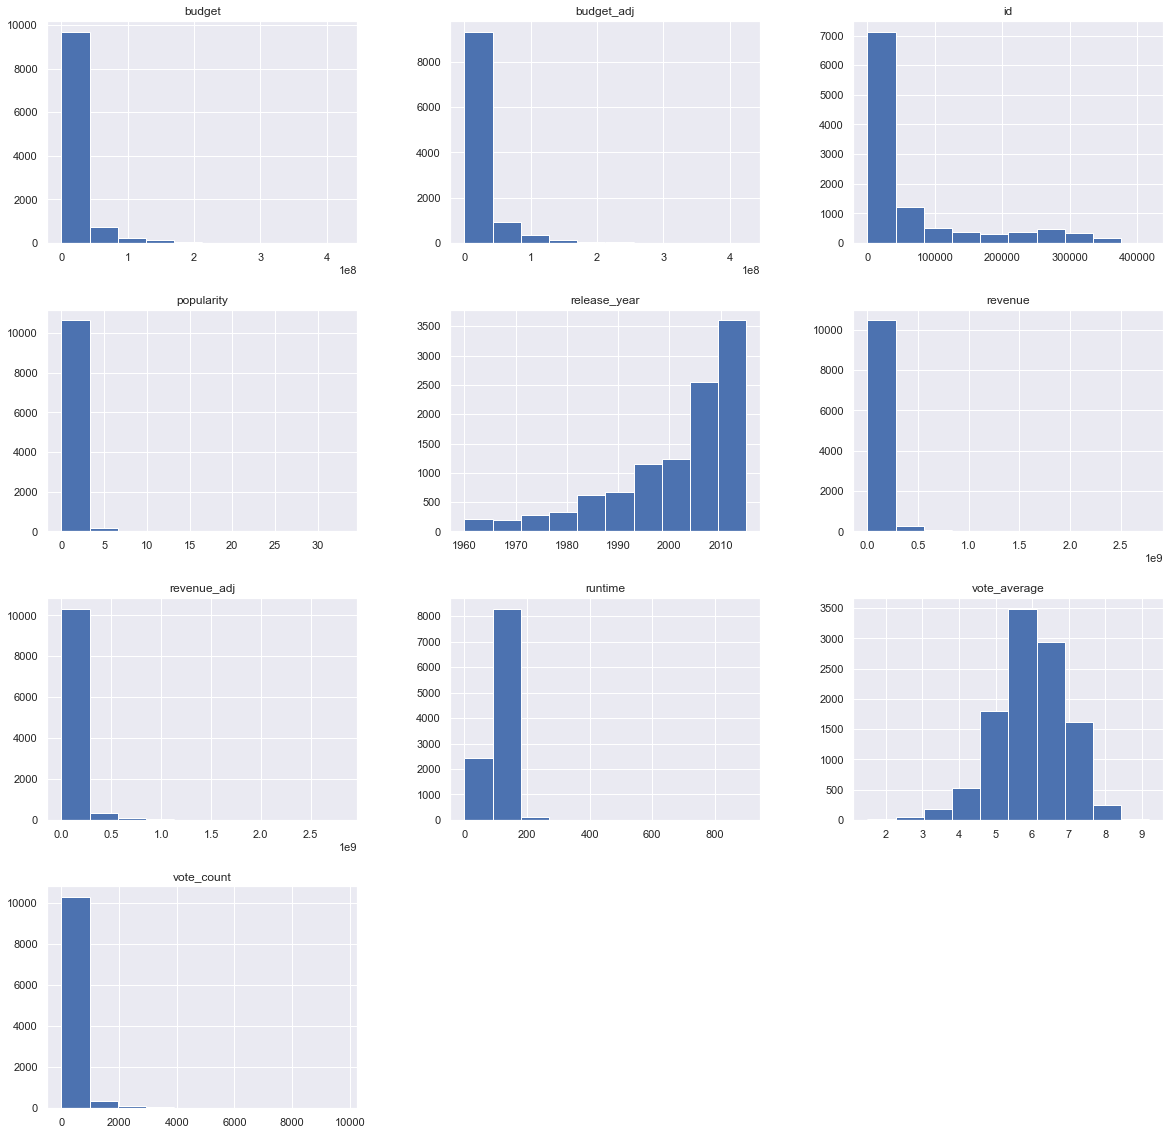

In [77]:
movies.hist(figsize=(20,20))

From the hostogram illustrated above i have noticed that budet and revenue contains lot of zeros. which may affect the results.So I decided to fill with mean of each columns to avoid dropping this amount of data 

 <a id='cleaning'></a>
## Data Cleaning

 In this section of the project  , I will be cleaning the main isuues that i have found in the data set and they are listed below :

    1- Remove unneeded columns 
    
    2- Remove Duplicates 
    
    3- Replace Zero with the mean of the columns that has lots of zeros and compute the profit 
    
    4- Change the data type for the release year to datetime
    
    5- Drop rows that contain missing values 
   

In [78]:
# 1- drop unneeded columns that have missing values 
movies.drop(['imdb_id', 'homepage', 'keywords','tagline','keywords',
             'production_companies','revenue_adj','budget_adj','overview','vote_count','vote_average'], axis=1, inplace=True)

In [79]:
# 2-drop duplicates
movies.drop_duplicates(inplace=True)
# check whether the duplicate has been removed successfully 
sum(movies.duplicated())

0

In [80]:
# 3- replace Zero in the budget and the revenue to the mean + compute the profit   
movies['budget']=movies['budget'].replace(0,movies['budget'].mean())
movies['revenue']=movies['revenue'].replace(0,movies['revenue'].mean())
movies['profit'] = movies['revenue']- movies['budget']

In [81]:
# 4- convert the data type for the release date from object to DataTime 
movies["release_date"]=pd.to_datetime(movies["release_date"])
#double check that the data type has been converted successfully 
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null float64
revenue           10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
release_year      10865 non-null int64
profit            10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [82]:
#  5-  Drop rows that contain missing values 
movies.dropna(inplace=True)
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
profit            0
dtype: int64

<a id='eda'></a>
### Exploratory Data Analysis 
In this section of the project , I will be visualizing some aspects of the data set to be able to answer my questions illustrated above

### Question 1 : Who are the top 10 actors who have filmed the most ? 

In [83]:
# method split is used to split the columns that contains "|" 
def Split(column_name): 
    new_df = movies[column_name].str.cat(sep="|")
    new_df = pd.Series(new_df.split("|"))
    return new_df

In [84]:
# Split the cast column and count their occurances
splitted_cast = Split('cast')
count= splitted_cast.value_counts()

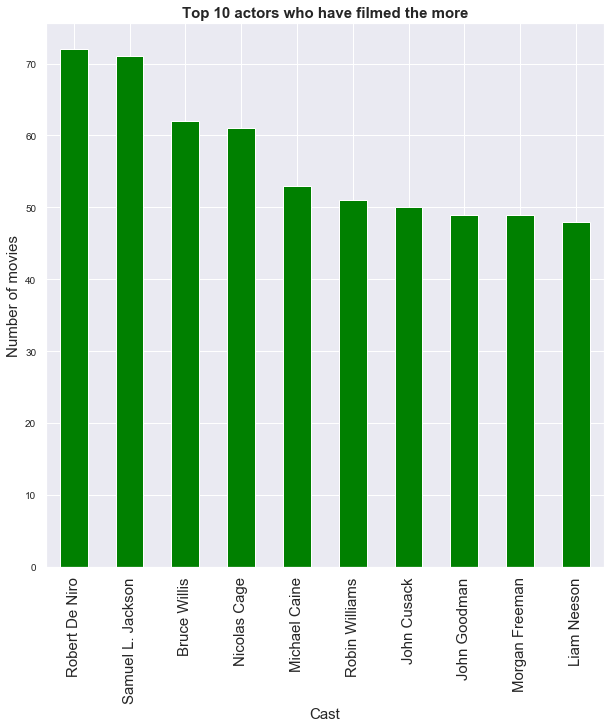

In [85]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Cast', fontsize=15)
ax.set_ylabel('Number of movies' , fontsize=15)
ax.set_title('Top 10 actors who have filmed the more', fontsize=15, fontweight='bold')

count[:10].plot(figsize=(10,10), color = 'green' , ax=ax, kind='bar')


The graph illustrated above shows the highest actors throughout the year -starting from 1960- who have acted in the largest number of movies.From the graph I can conclude that the actor who has filmed the largest amount of  movies among other actors is Robert De Niro followed by Samual Jackson

### Question 2 : Who are the top 10 directors who have directed the most ?

In [86]:
# Split the directors and count their occurances 
splitted_directors=Split('director')
count= splitted_directors.value_counts()

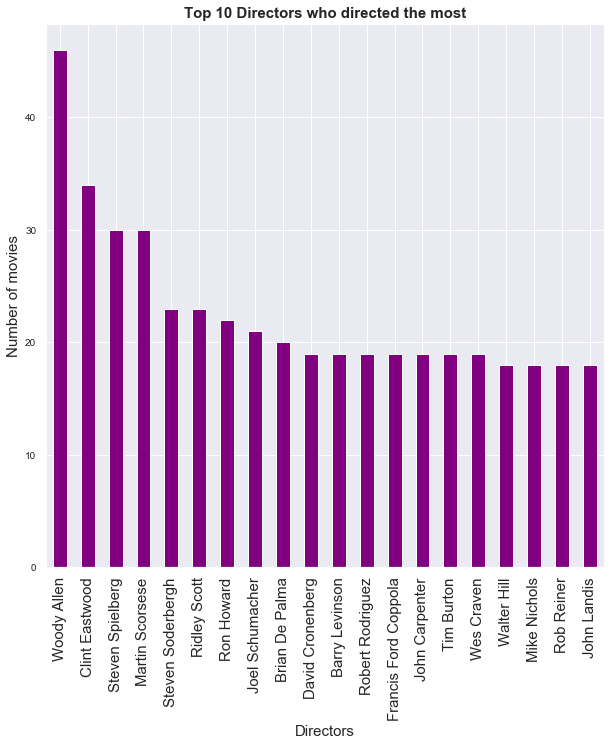

In [87]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Directors', fontsize=15)
ax.set_ylabel('Number of movies' , fontsize=15)
ax.set_title('Top 10 Directors who directed the most', fontsize=15, fontweight='bold')

count[:20].plot(figsize=(10,10), color = 'purple' , ax=ax, kind='bar')



The graph illustrated above shows the top 10 directors whom have directed the most since 1960 .From the graph I can conclude that the director who had directed the largest number of movies is Woody Allen followed by Clint Eastwood and so on .

### Question 3 : What are the most used genre in the movie industry throughout the years ?

In [88]:
 # Split the genre and count their occurances
splitted_genres=Split('genres')
count= splitted_genres.value_counts()

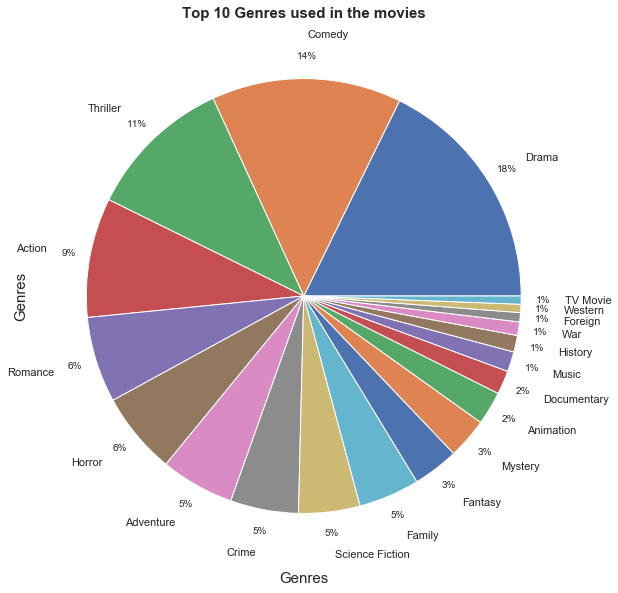

In [89]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Number of movies' , fontsize=15)
ax.set_title('Top 10 Genres used in the movies', fontsize=15, fontweight='bold')

count.plot(label = "Genres" , figsize=(20,10), ax=ax, kind='pie', autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)




The graph illustrates the distribution of the genres used in the movies throughout the year. It shows that Drama is the most used genre in the movie industry with apercentage of 18% 

### Question 4 : What are the top movies that has had the highest profits throughout the movie industry ? 

I assumed that high profits movies are the one with profits higher than the mean.

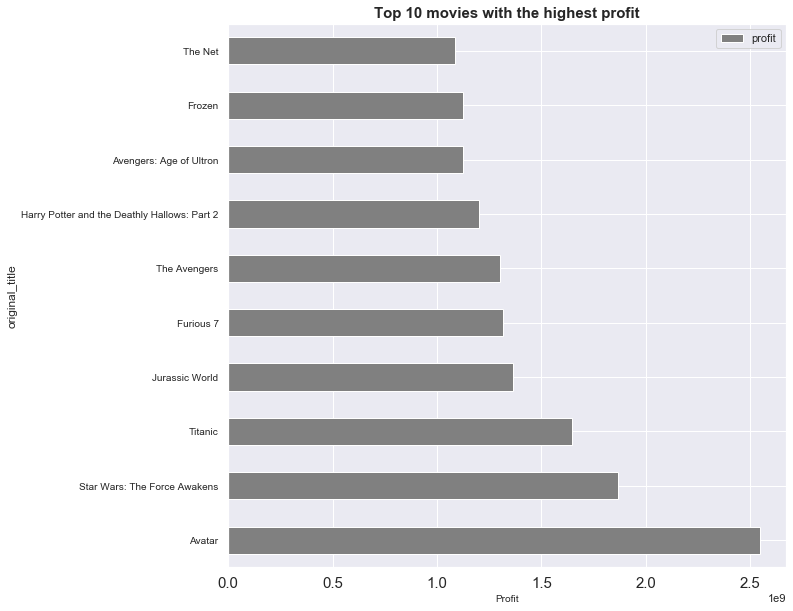

In [90]:
# calculate the mean 
mean = movies['profit'].mean()
# Compare the profit and assign the high profit movies to high_movies
high_movies = movies[movies['profit']> mean].sort_values(by='profit', ascending=False)
# visulaize the result

fig, ax = plt.subplots(figsize=(10,10))

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Profit' , fontsize=10)

ax.set_title('Top 10 movies with the highest profit', fontsize=15, fontweight='bold')

high_movies[:10].plot(ax=ax , x='original_title',y='profit', kind='barh',color="grey")

The figure above shows the top movies with highest profits among the years.From the graph , it is shown that Avatar has had the highest profit among the other movies

#### Question 5 : Does the budget has an affect on the profits of the  high movies ? 

Text(0, 0.5, 'Profit')

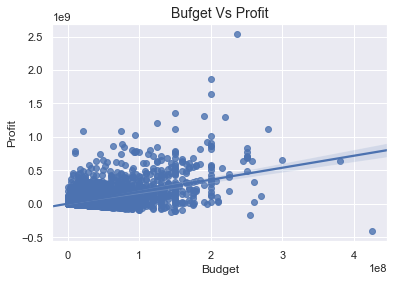

In [91]:
# Create a scatter for the budget and profit.

ax = sns.regplot(x=movies['budget'],y=movies['profit'])

#setup the title and the labels of the scatter plot.
ax.set_title("Bufget Vs Profit",fontsize=14)
ax.set_xlabel("Budget",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)


The figure above illustrates the relationship between the budget and profit. From the figure, it is shown that a positive and a linear association does exsist between the budget and the profit with few outliers . 

In [92]:
correlation = movies['budget'].corr(movies['profit'])
print(correlation)

0.5385849360667272


 Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. This indicate that the budget and the profit may have a relationship between each other.In other words profit may be affected by the budget

 <a id='conc'></a>
### Conclusion 

In the end of this project , I was able to answer the specified question I have asked above and I came out with this conclusion : 

#### 1- The director who had directed the largest number of movies is Woody Allen followed by Clint Eastwood 
#### 2- The actor who has filmed the largest amount of  movies among other actors is Robert De Niro followed by Samual Jackson 
#### 3- The most used genre in the movie indusrty is Drama followed by Comedy movies.
#### 4- The movie who has had the highest profit since 1960 is Avater followed by Stars Wars 
#### 5- The correlation between the budget and profits is 0.53 which indicate that there is a positive relationship  between the and for sure the budget affects the profits.

<a id='limit'></a>
### Limitations

1- Due to the fact that the revnue and  budget columns has had lots of zeros which may indicate that it is a missing value. I do believe that having such amount of missing values would definitly affect the final result.Also,computing the mean and replacing it with a large number of values-as I did- would definitly affect the results.

2- In addition, their is no clear definiton for a high profit movie so I assumed that high profit movies are the ones with profits that are greater than the mean. This may lead to having diffrent results from one data anaylst to another.

<a id='ref'></a>
#### References
StackOverFlow

Pandas
